# Statistics:
1. Descriptive stats: Organinzing and summarizing data
2. Inferential stats: Techniques where in we use the observation to form conclusions 

## Descriptive statistics 
1. Average
2. Median
3. Mode etc....

In [1]:
import numpy as np
import random
marks = [random.randint(25,100) for i in range(30)]
print(marks)

[91, 68, 78, 70, 96, 80, 68, 94, 65, 61, 70, 38, 87, 86, 36, 40, 71, 77, 83, 30, 84, 27, 90, 84, 47, 32, 93, 57, 81, 44]


In [2]:
marks = np.array(marks)
marks

array([91, 68, 78, 70, 96, 80, 68, 94, 65, 61, 70, 38, 87, 86, 36, 40, 71,
       77, 83, 30, 84, 27, 90, 84, 47, 32, 93, 57, 81, 44])

In [3]:
## Printing all  the descriptive statistics in this cell
print(f"Total no of students in the classroom : {marks.shape[0]}")
print(f"Sorted order of the marks in the class : {np.sort(marks)}")
print(f"Sum of marks of the students in the class : {np.sum(marks)}")
print(f"Average of the marks of the students in the class : {marks.mean()}")
print(f"Median of the marks of the students in the class : {np.median(marks)}")
print(f"Maximum marks of the students in the class : {np.max(marks)}")
print(f"Minimum marks of the students in the class : {np.min(marks)}")
print(f"Location of highest marks of the students in the class : {np.argmax(marks)}")
print(f"Location of Lowest marks of the students in the class : {np.argmin(marks)}")
print(f"Standard deviation of the marks in the class: {marks.std()}")

Total no of students in the classroom : 30
Sorted order of the marks in the class : [27 30 32 36 38 40 44 47 57 61 65 68 68 70 70 71 77 78 80 81 83 84 84 86
 87 90 91 93 94 96]
Sum of marks of the students in the class : 2028
Average of the marks of the students in the class : 67.6
Median of the marks of the students in the class : 70.5
Maximum marks of the students in the class : 96
Minimum marks of the students in the class : 27
Location of highest marks of the students in the class : 4
Location of Lowest marks of the students in the class : 21
Standard deviation of the marks in the class: 21.09597117935081


## Measure of central tendency:
Refers to the measure used to determine the center of the distribution.
1. Mean : It is used for data which normally distributed.
2. Median : It is used for data which contains outliers.
3. Mode : It works well with categorical variables

In [35]:
import numpy as np
norm_data = np.random.normal(12,0.35,10)
print(norm_data)

[12.00771577 11.71396293 12.226337   12.38542916 12.75940049 12.11700172
 11.62175587 10.88378128 11.87574911 12.16920432]


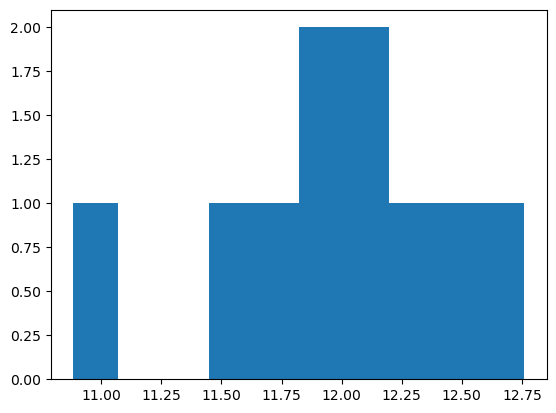

In [36]:
import matplotlib.pyplot as plt
plt.hist(norm_data);

In [37]:
center_of_norm_data = norm_data.mean()
center_of_norm_data

11.97603376543997

In [38]:
# Now let us add some outlier to data
norm_data_list = list(norm_data)
norm_data_list.append(100)
norm_data_list.append(45)
norm_data_list.append(67)
norm_data_list = np.array(norm_data_list)
print(norm_data_list)

[ 12.00771577  11.71396293  12.226337    12.38542916  12.75940049
  12.11700172  11.62175587  10.88378128  11.87574911  12.16920432
 100.          45.          67.        ]


In [39]:
# Now let us see what happen if we use the mean as the measure of central tendency
norm_data_list.mean()

25.52002597341536

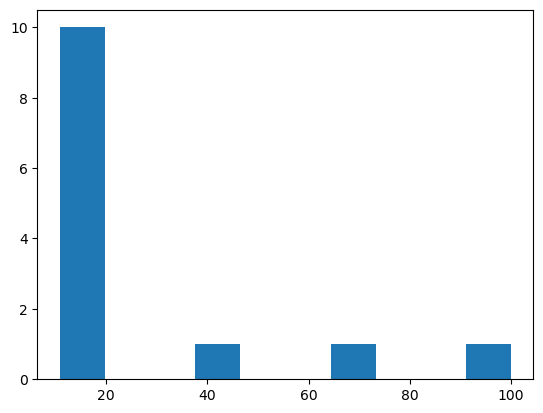

In [40]:
plt.hist(norm_data_list);

In [41]:
np.median(norm_data_list)

12.16920432086963

## Measure of Dispersion:
Refers to how well the data is distributed that means whether the data is left skewed or right skewed etc
1. Variance
2. Standard deviation 

In [53]:
def calculate_variance(arr):
    arr = list(arr)
    mu = sum(arr)/len(arr)
    s=0
    for i in arr:
        s+=(i-mu)**2
    return s/len(arr)
def standard_deviation(arr):
    var = calculate_variance(arr)
    return var ** (1/2)
arr = [np.random.randint(1,100) for i in range(20)]

print(calculate_variance(arr))
print(standard_deviation(arr))

745.0875
27.29629095683148


## Percentile and Quartiles:
1. Percentile : A percentile is a value below which a certain percentage of observations lie.

In [54]:
sample = [i for i in range(20)]
sample

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [55]:
# Percentage of no of odd numbers in the above sample:
percent  = len([i for i in sample if i%2!=0])/len(sample)
percent

0.5

In [85]:
# What is the percentile ranking of 10?
def calculate_percentile(arr,n):
    arr = sorted(arr)
    res = len([i for i in arr if i<n])/len(arr)
    return res*100
per_of_10 = calculate_percentile(sample,10)
per_of_10

50.0

From the above analysis this was clear that 50% of entire sample data lies below the 10.

In [86]:
# What value lies at percentile 25%?
def percentile(arr,per):
    arr = sorted(arr)
    index = (per/100)*(len(arr)+1) 
    return sum(arr[round(index):round(index)+1])

percentile(sample,25)

5

In [87]:
print(calculate_percentile(sample,14))
percentile(sample,65)

70.0


14

## Outliers

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [73]:
## Define our dataset
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

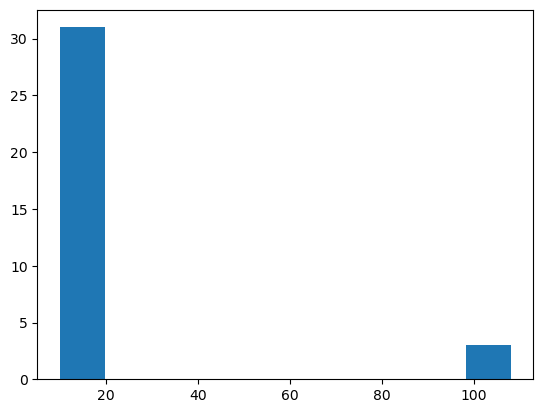

In [74]:
plt.hist(dataset)
plt.show()

In [75]:
## Z Score
outliers=[]

def detect_outliers(data):
  threshold=3 ## 3 std deviation
  mean=np.mean(data)
  std=np.std(data)

  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)> threshold:
      outliers.append(i)

  return outliers



In [76]:
detect_outliers(dataset)

[102, 107, 108]

## Five number summary:
1. Sort the data
2. Calculate Q1 aqnd Q3
3. IQR(Q3-Q1)
4. Find the Lower fence(q1-1.5(iqr))
5. Find the upper fence(q3+1.5(iqr))

In [77]:
dataset=sorted(dataset)
print(dataset)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [78]:
q1,q3=np.percentile(dataset,[25,75])

In [88]:
q1 = percentile(dataset,25)
q3 = percentile(dataset,75)
q1,q3

(12, 15)

In [79]:
print(q1,q3)

12.0 15.0


In [80]:
iqr=q3-q1
print(iqr)

3.0


In [81]:
## Find the lower fence and higher fence
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5* iqr)

In [82]:
print(lower_fence,higher_fence)

7.5 19.5


In [84]:
outliers = [i for i in dataset if i>higher_fence or i<lower_fence]
outliers

[102, 107, 108]

## Boxplot to determine outliers in the data:

In [89]:
import seaborn as sns


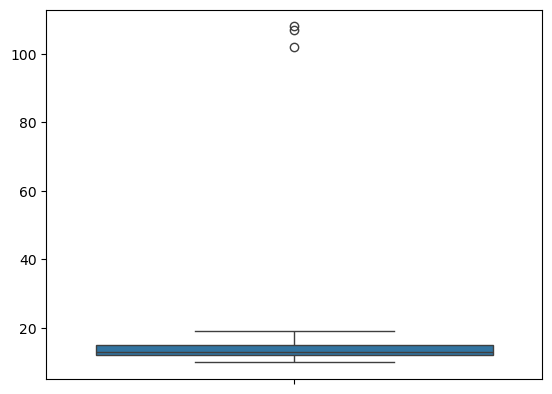

In [90]:
sns.boxplot(dataset)
plt.show()

## Why sample variance is divided by `n-1`:

In [92]:
# Let us consider a population consisting 100 students 
population =np.array([np.random.randint(25,50) for i in range(100)])
print(population)

[49 35 33 49 47 37 49 32 26 47 43 34 38 33 43 44 31 25 31 45 36 28 46 39
 42 43 29 42 25 49 35 33 47 37 31 39 42 45 32 47 48 27 43 48 34 38 37 41
 34 39 47 48 29 32 29 32 49 40 29 25 39 28 43 49 31 33 36 29 33 30 27 33
 29 30 45 36 44 29 46 47 42 28 36 44 32 31 25 45 34 29 27 46 28 32 25 39
 49 48 48 44]


In [93]:
# Now lets us calculate the mean and standard deviation of the population 
pop_mean = np.mean(population)
pop_std = np.std(population)
pop_mean,pop_std

(37.36, 7.596736141264879)

In [97]:
# Now let us consider three different samples from the population
sample_1 = population[:10]
sample_2 = np.array([random.choice(population) for i in range(10)])
sample_3 = population[-10:]
print(f"Sample 1 :{sample_1} and length: {sample_1.shape[0]}")
print(f"Sample 2 :{sample_2} and length: {sample_2.shape[0]}")
print(f"Sample 3 :{sample_3} and length: {sample_3.shape[0]}")

Sample 1 :[49 35 33 49 47 37 49 32 26 47] and length: 10
Sample 2 :[27 48 48 46 29 42 29 28 41 34] and length: 10
Sample 3 :[27 46 28 32 25 39 49 48 48 44] and length: 10


In [99]:
# Now let us calculate the mean and standard deviation of the samples:
s1_mean,s1_std = np.mean(sample_1),standard_deviation(sample_1)
s2_mean,s2_std = np.mean(sample_2),np.std(sample_2)
s3_mean,s3_std = np.mean(sample_3),np.std(sample_3)
print(f"Sample 1 mean is : {s1_mean} and standard deviation is: {s1_std}")
print(f"Sample 2 mean is : {s2_mean} and standard deviation is: {s2_std}")
print(f"Sample 3 mean is : {s3_mean} and standard deviation is: {s3_std}")

Sample 1 mean is : 40.4 and standard deviation is: 8.260750571225353
Sample 2 mean is : 37.2 and standard deviation is: 8.255906976220118
Sample 3 mean is : 38.6 and standard deviation is: 9.189124006128115


From the above analysis it was clear that the sample mean and standard deviation will vary a lot if the data is skewed as sample_1. To overcome this problem scientist come up with a solution that is divide the squared sum of difference by n-1.

## Distributions: 
There are various types of distribution.There are as follows:
1. Gaussian/ Normal distribution 
2. possion distribution
3. Uniform distribution
4. Binomial distribution
5. Exponential distribution
6. Gamma distribution
7. Beta distribution
8. Log normal distribution 
9. Chi square distribution

### 1. Normal (Gaussian) Distribution

`Why it’s useful?`
- Many natural phenomena follow a normal distribution (e.g., heights, test scores, stock returns).
- Used in hypothesis testing, confidence intervals, and predictive modeling.
- Many machine learning algorithms assume normally distributed data.

 
`Use Cases:`
- Feature scaling (standardization: mean = 0, variance = 1).
- Central Limit Theorem (aggregate data trends to normal).
- Z-scores and confidence intervals.

- Mean vs. Median: If mean ≠ median, the distribution is skewed.
- Variance & Standard Deviation: Higher values mean the data is more spread out.

`Skewness`:
- Skew = 0: Symmetric (Normal distribution)
- Skew > 0: Right-skewed (Exponential, Log-normal)
- Skew < 0: Left-skewed


`Kurtosis:`
- Kurtosis = 0: Normal distribution
- Kurtosis > 0: Heavy tails (more outliers)
- Kurtosis < 0: Light tails (less extreme values)

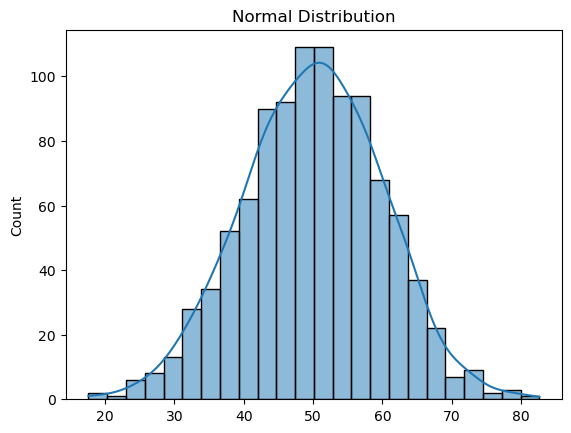

In [119]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = np.random.normal(loc=50, scale=10, size=1000)  # Mean=50, Std=10
sns.histplot(data, kde=True)
plt.title("Normal Distribution")
plt.show()

In [120]:
# Calculate statistical properties
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)
variance = np.var(data)
std_dev = np.std(data)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

# Print results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 49.99118851436411
Median: 50.21214769485339
Mode: ModeResult(mode=17.61414639276414, count=1)
Variance: 99.19240045667733
Standard Deviation: 9.959538164828595
Skewness: -0.0604760345773762
Kurtosis: -0.042567976278692576


### 2. Uniform Distribution

`Why it’s useful?`
- Used in simulation models and random sampling.
- Helps understand randomness and probability.

`Use Cases:`
- Generating synthetic data.
- Monte Carlo simulations.
- Randomized A/B testing.

[21.75399648 83.18021535 10.81203707 55.05187485 98.28479608  9.68709049
 34.01023598 74.73602039 69.53836259 98.62196778]


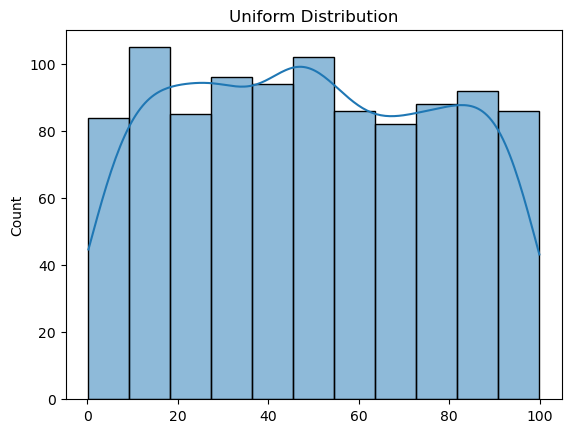

In [122]:
data = np.random.uniform(low=0, high=100, size=1000)
print(data[:10])
sns.histplot(data, kde=True)
plt.title("Uniform Distribution")
plt.show()

In [123]:
# Calculate statistical properties
mean = np.mean(data)
median = np.median(data)
mode = stats.mode(data)
variance = np.var(data)
std_dev = np.std(data)
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

# Print results
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")

Mean: 49.39089202199318
Median: 48.04421115572406
Mode: ModeResult(mode=0.23710721840852766, count=1)
Variance: 812.6071586566393
Standard Deviation: 28.50626525268856
Skewness: 0.044375856848402395
Kurtosis: -1.178614350349509


### 3. Binomial Distribution

`Why it’s useful?`
- Models binary outcomes (success/failure, click/no click).
- Used in A/B testing and marketing analytics.

`Use Cases:`
- Customer conversion rates.
- Predicting coin toss outcomes.
- Fraud detection in transactions.


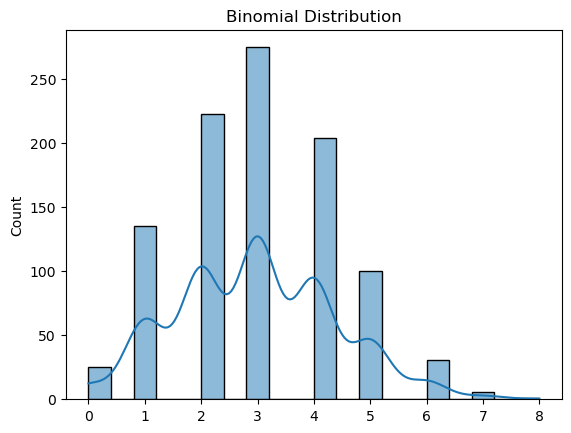

In [108]:
data = np.random.binomial(n=10, p=0.3, size=1000)  # 10 trials, p(success)=0.3
sns.histplot(data, kde=True)
plt.title("Binomial Distribution")
plt.show()


### 4. Possion Distribution

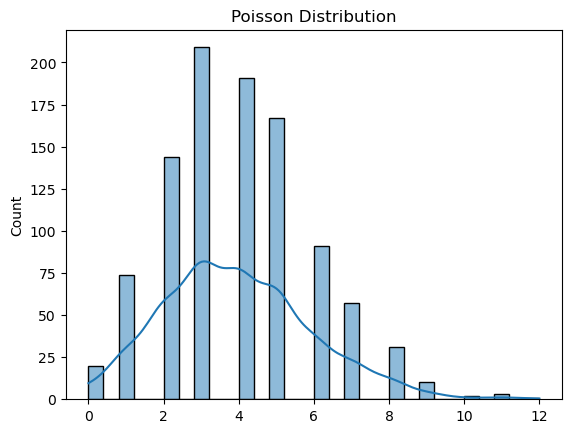

In [110]:
data = np.random.poisson(lam=4, size=1000)  # Avg 4 events per unit time
sns.histplot(data, kde=True)
plt.title("Poisson Distribution")
plt.show()

### Exponential distribution :

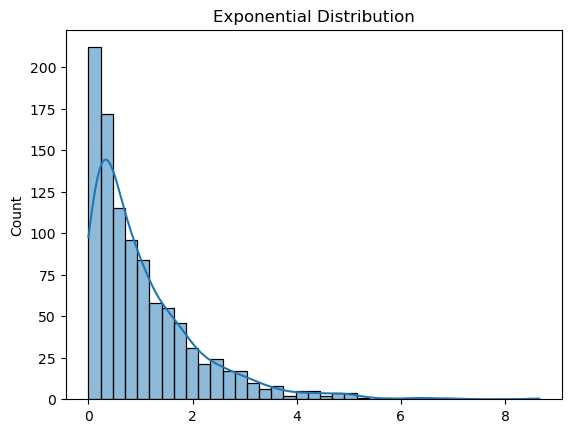

In [111]:
data = np.random.exponential(scale=1, size=1000)
sns.histplot(data, kde=True)
plt.title("Exponential Distribution")
plt.show()

### Gamma distribution:

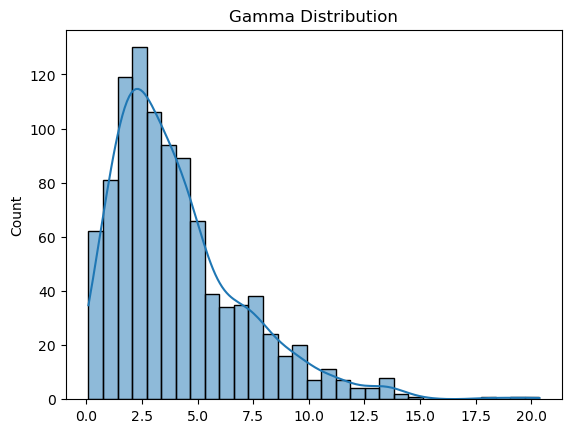

In [112]:
data = np.random.gamma(shape=2, scale=2, size=1000)
sns.histplot(data, kde=True)
plt.title("Gamma Distribution")
plt.show()


### Beta distribution :

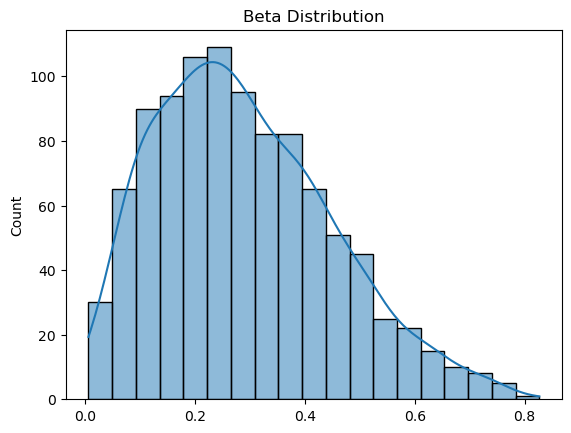

In [113]:
data = np.random.beta(a=2, b=5, size=1000)
sns.histplot(data, kde=True)
plt.title("Beta Distribution")
plt.show()


### Chi sqaure distribution :

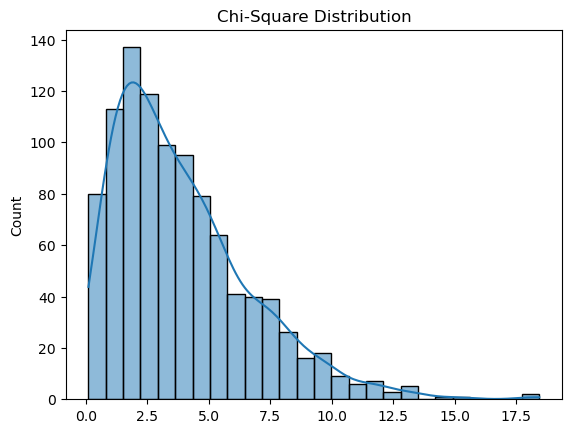

In [114]:
data = np.random.chisquare(df=4, size=1000)
sns.histplot(data, kde=True)
plt.title("Chi-Square Distribution")
plt.show()

### Log normal distribution:

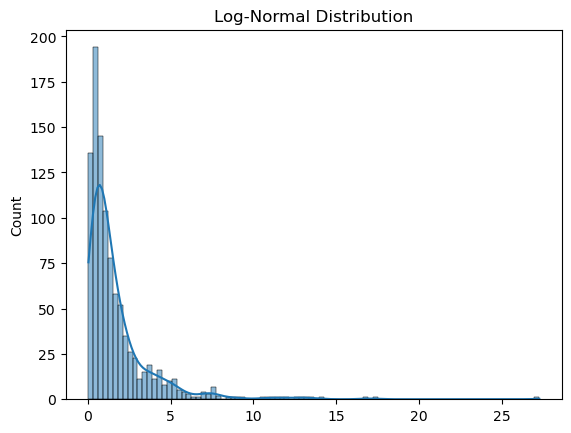

In [115]:
data = np.random.lognormal(mean=0, sigma=1, size=1000)
sns.histplot(data, kde=True)
plt.title("Log-Normal Distribution")
plt.show()

## Standardization:
The process of converting data into standard normal distribution where mean equal to zero and variance equal to 1. To perform standardization we use `Z Score` . 

`Uses :` 
1. when the input data are in different scales like in meters,centimetres to make them equal importance we standardize the values and convert into same units.

In [124]:
def Z_Score(arr):
    stand_arr = []
    mu = sum(arr)/len(arr)
    std = standard_deviation(arr)
    for i in arr:
        stand_arr.append((i-mu)/std)
    return stand_arr

In [129]:
sample = [random.randint(1,1000) for _ in range(20)]
sample

[752,
 532,
 213,
 367,
 855,
 113,
 933,
 475,
 273,
 722,
 835,
 542,
 669,
 860,
 535,
 654,
 572,
 391,
 746,
 437]

In [130]:
Z_Score(sample)

[0.7973257316420622,
 -0.18702702347159458,
 -1.614338518386397,
 -0.9252915898068372,
 1.258181794263456,
 -2.0617715888926047,
 1.607179589258298,
 -0.44206387366013294,
 -1.3458786760826724,
 0.6630958104901999,
 1.1686951801622145,
 -0.14228371642097382,
 0.42595628312190986,
 1.2805534477887666,
 -0.17360403135640837,
 0.3588413225459787,
 -0.008053795269111534,
 -0.8179076528853474,
 0.7704797474116898,
 -0.6120884404524919]

## Normalization : 
The process of converting given data within a interval i.e 0-1 or -1 to 1. To do this there are three techniques.
1. Min Max normarlization
2. Z Score
3. Decimal Scaling

### Min Max normalization:

In [131]:
def min_max_normal(arr,new_min,new_max):
    res = []
    old_min = min(arr)
    old_max = max(arr)
    for i in arr:
        r1 = (i-old_min)/(old_max-old_min)*(new_max-new_min)+new_min
        res.append(r1)
    return res

In [132]:
min_max_normal(sample,0,1)

[0.7792682926829269,
 0.5109756097560976,
 0.12195121951219512,
 0.3097560975609756,
 0.9048780487804878,
 0.0,
 1.0,
 0.44146341463414634,
 0.1951219512195122,
 0.7426829268292683,
 0.8804878048780488,
 0.5231707317073171,
 0.6780487804878049,
 0.9109756097560976,
 0.5146341463414634,
 0.6597560975609756,
 0.5597560975609757,
 0.33902439024390246,
 0.7719512195121951,
 0.3951219512195122]

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
s = np.array(sample)
scaler.fit(s.reshape(-1,1))
scaler.transform(s.reshape(-1,1))

array([[0.77926829],
       [0.51097561],
       [0.12195122],
       [0.3097561 ],
       [0.90487805],
       [0.        ],
       [1.        ],
       [0.44146341],
       [0.19512195],
       [0.74268293],
       [0.8804878 ],
       [0.52317073],
       [0.67804878],
       [0.91097561],
       [0.51463415],
       [0.6597561 ],
       [0.5597561 ],
       [0.33902439],
       [0.77195122],
       [0.39512195]])

### Z Score:

In [137]:
Z_Score(sample)

[0.7973257316420622,
 -0.18702702347159458,
 -1.614338518386397,
 -0.9252915898068372,
 1.258181794263456,
 -2.0617715888926047,
 1.607179589258298,
 -0.44206387366013294,
 -1.3458786760826724,
 0.6630958104901999,
 1.1686951801622145,
 -0.14228371642097382,
 0.42595628312190986,
 1.2805534477887666,
 -0.17360403135640837,
 0.3588413225459787,
 -0.008053795269111534,
 -0.8179076528853474,
 0.7704797474116898,
 -0.6120884404524919]

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s = np.array(sample)
scaler.fit(s.reshape(-1,1))
scaler.transform(s.reshape(-1,1))

array([[ 0.79732573],
       [-0.18702702],
       [-1.61433852],
       [-0.92529159],
       [ 1.25818179],
       [-2.06177159],
       [ 1.60717959],
       [-0.44206387],
       [-1.34587868],
       [ 0.66309581],
       [ 1.16869518],
       [-0.14228372],
       [ 0.42595628],
       [ 1.28055345],
       [-0.17360403],
       [ 0.35884132],
       [-0.0080538 ],
       [-0.81790765],
       [ 0.77047975],
       [-0.61208844]])

### Decimal Scaling:

In [140]:
def decimal_scaling(arr):
    res = []
    m = len(str(max(arr)))
    for i in arr:
        res.append(i/10**m)
    return res

In [141]:
decimal_scaling(sample)

[0.752,
 0.532,
 0.213,
 0.367,
 0.855,
 0.113,
 0.933,
 0.475,
 0.273,
 0.722,
 0.835,
 0.542,
 0.669,
 0.86,
 0.535,
 0.654,
 0.572,
 0.391,
 0.746,
 0.437]